In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_vers_data_covid19_vaccine_2020-2022_duplicate_removed.csv')

C:\Users\dharm\AppData\Local\Temp\ipykernel_41172\121219358.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_vers_data_covid19_vaccine_2020-2022_duplicate_removed.csv')


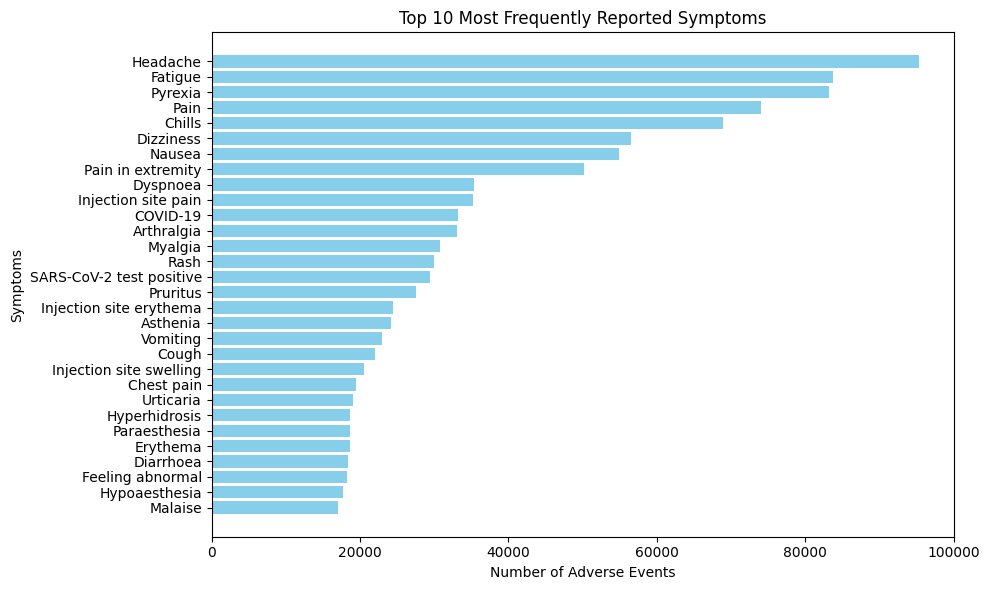

In [3]:
# Split the 'Symptoms' column by comma and create a list of all symptoms
all_symptoms = df['Symptoms'].str.split(',').explode().str.strip()
# Count the occurrences of each symptom
symptom_counts = all_symptoms.value_counts().reset_index()
symptom_counts.columns = ['Symptom', 'Frequency']

symptom_counts = symptom_counts.sort_values(by='Frequency', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(symptom_counts['Symptom'][:30], symptom_counts['Frequency'][:30], color='skyblue')
plt.xlabel('Number of Adverse Events')
plt.ylabel('Symptoms')
plt.title('Top 10 Most Frequently Reported Symptoms')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent symptom at the top
plt.tight_layout()
plt.show()


In [4]:
# Convert the 'HOSPDAYS' column values to float type to handle scientific notation
df['HOSPDAYS'] = df['HOSPDAYS'].astype(float)
# Convert float values to integers
df['HOSPDAYS'] = df['HOSPDAYS'].astype(int)

df['HOSPDAYS'].unique()


array([    0,     1,     2,     4,     3,     6,     9,     5,    11,
          10,     8,     7,    15,    14,    13,    17,    12,    21,
          20,    16,    24,    26,    36,    19,    18,    25,    27,
          29,    28,    39,    38,    37,    30,    43,    40,    23,
          32,    90,    22,    31,    55,    42,    35,    50,    45,
          51,    34,    44,    41,    33,    47,    65,    68,    59,
          80, 99999,    60,    78,    63,    82,    95,    97,    91,
         120,    92,    49,    52,    56,    67,    46,    62,    89,
          57,    54,    74,   101,    96,    66,   127,    87,   171,
          53,   100,    76,    70,    93,    75,    99,    81,    48,
         150,    58,   235,   113,   180,   215,   166,   114,   116,
         131,    88,    77,   102,   192,   147,    71,   122,   110,
          64,   300,   112,    94])

In [5]:
# for i in df['HOSPDAYS'].unique():
#     occurrences = (df['HOSPDAYS'] == i).sum()

#     # Output the number of occurrences of the specific value
#     print(f"The number of occurrences of {i} in 'HOSPDAYS' column: {occurrences}")

#     if occurrences < 200:
#         df = df[df['HOSPDAYS'] != i]

In [6]:
df['HOSPDAYS'].unique()
# df = df[df['HOSPDAYS'] != 99999]

array([    0,     1,     2,     4,     3,     6,     9,     5,    11,
          10,     8,     7,    15,    14,    13,    17,    12,    21,
          20,    16,    24,    26,    36,    19,    18,    25,    27,
          29,    28,    39,    38,    37,    30,    43,    40,    23,
          32,    90,    22,    31,    55,    42,    35,    50,    45,
          51,    34,    44,    41,    33,    47,    65,    68,    59,
          80, 99999,    60,    78,    63,    82,    95,    97,    91,
         120,    92,    49,    52,    56,    67,    46,    62,    89,
          57,    54,    74,   101,    96,    66,   127,    87,   171,
          53,   100,    76,    70,    93,    75,    99,    81,    48,
         150,    58,   235,   113,   180,   215,   166,   114,   116,
         131,    88,    77,   102,   192,   147,    71,   122,   110,
          64,   300,   112,    94])

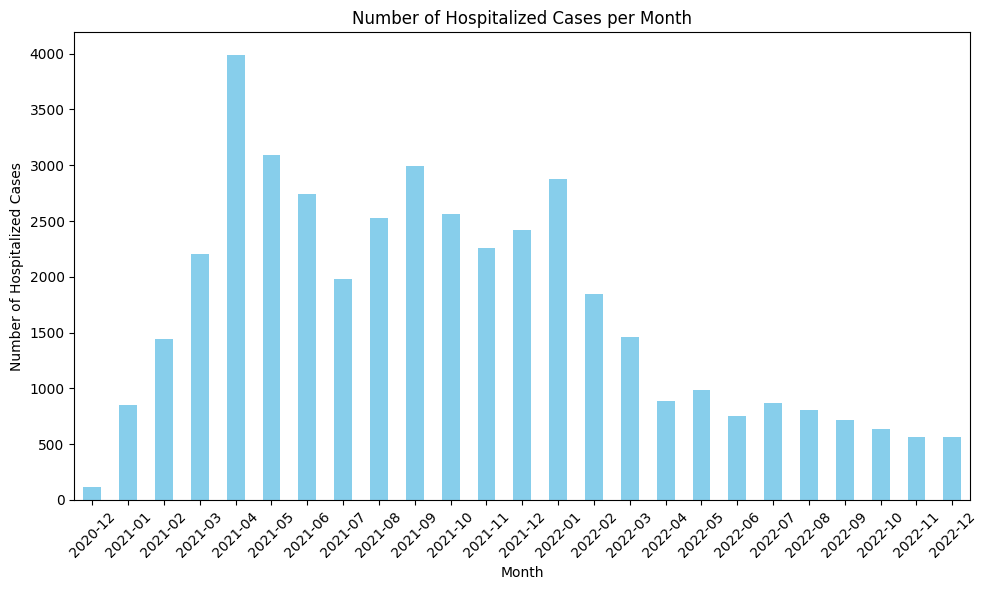

In [7]:
df['DATE_TIME'] = pd.to_datetime(df['RECVDATE'])
df['DATE_TIME']
# Filter data for rows where 'HOSPDAYS' is 'Y'
hospitalized_cases = df[df['HOSPITAL'] == 'Y']

# Group by month and count the number of hospitalized cases for each month
hospitalized_cases_per_month = hospitalized_cases.groupby(hospitalized_cases['DATE_TIME'].dt.to_period('M')).size()

# Plotting
plt.figure(figsize=(10, 6))
hospitalized_cases_per_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Hospitalized Cases')
plt.title('Number of Hospitalized Cases per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

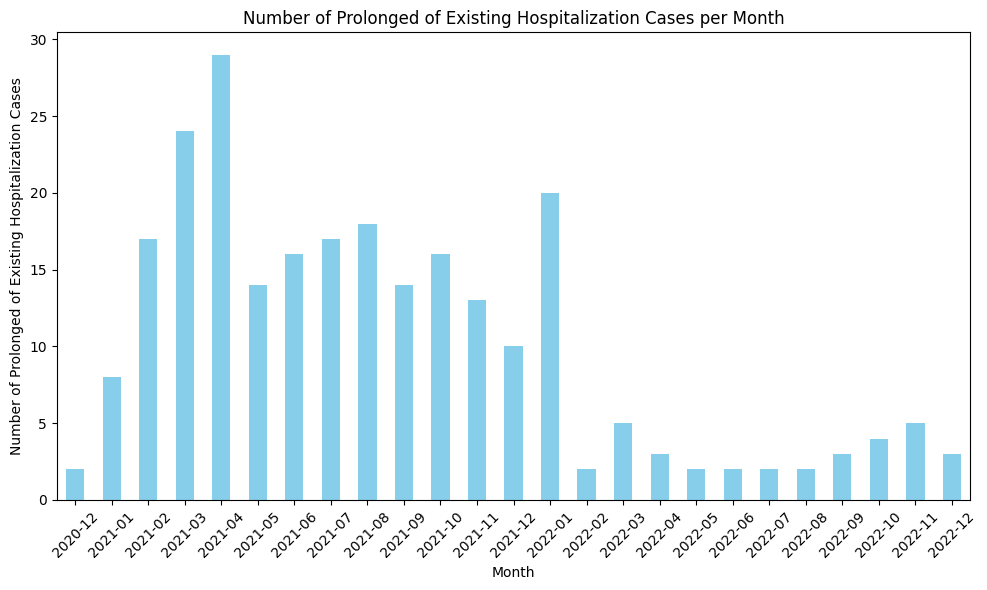

In [8]:

# Filter data for rows where 'HOSPDAYS' is 'Y'
hospitalized_cases = df[df['X_STAY'] == 'Y']

# Group by month and count the number of hospitalized cases for each month
hospitalized_cases_per_month = hospitalized_cases.groupby(hospitalized_cases['DATE_TIME'].dt.to_period('M')).size()

# Plotting
plt.figure(figsize=(10, 6))
hospitalized_cases_per_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Prolonged of Existing Hospitalization Cases')
plt.title('Number of Prolonged of Existing Hospitalization Cases per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

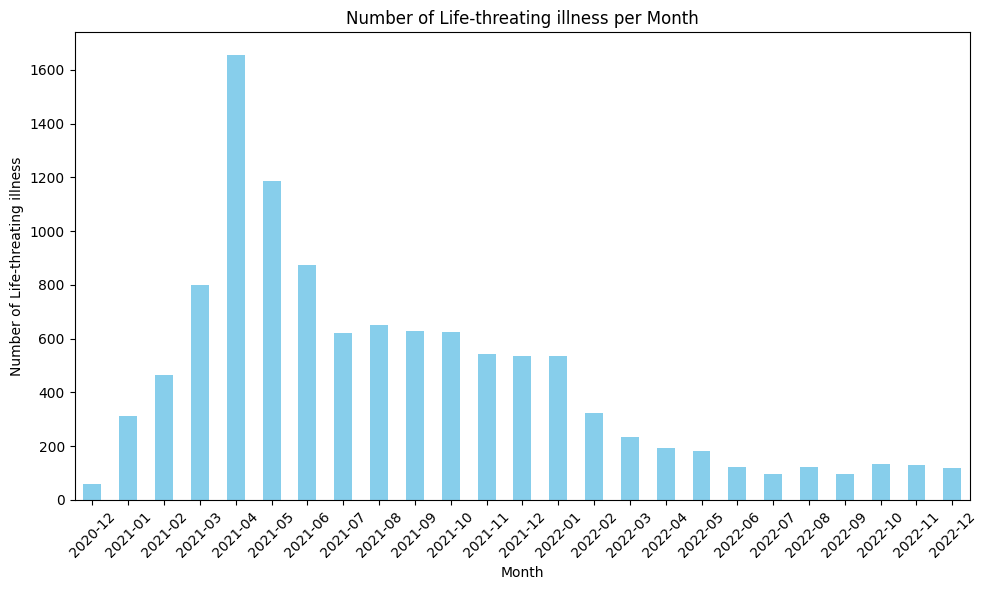

In [9]:
# Filter data for rows where 'HOSPDAYS' is 'Y'
hospitalized_cases = df[df['L_THREAT'] == 'Y']

# Group by month and count the number of hospitalized cases for each month
hospitalized_cases_per_month = hospitalized_cases.groupby(hospitalized_cases['DATE_TIME'].dt.to_period('M')).size()

# Plotting
plt.figure(figsize=(10, 6))
hospitalized_cases_per_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Life-threating illness')
plt.title('Number of Life-threating illness per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

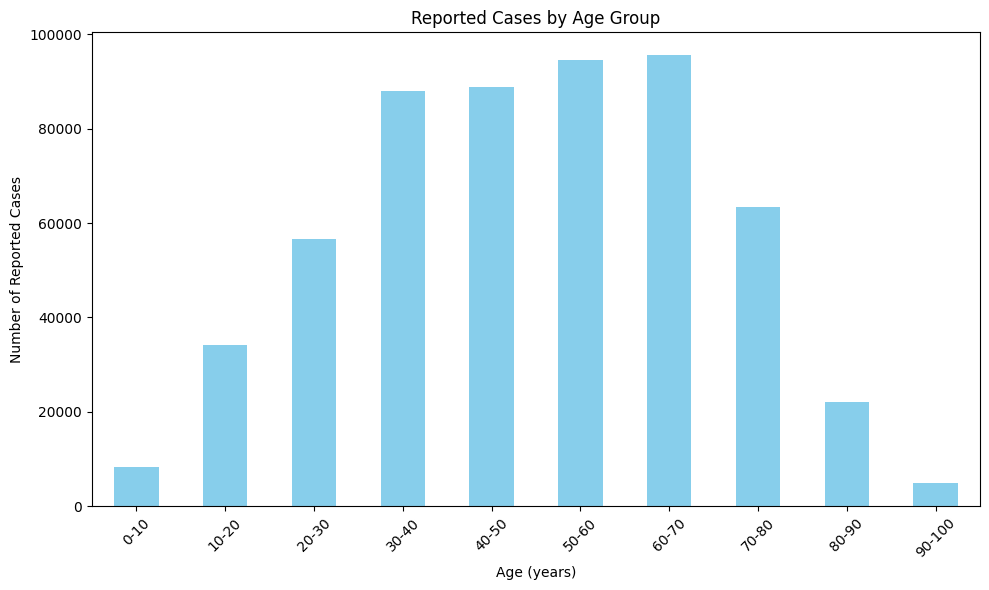

In [10]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create labels for the age bins
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Categorize ages into bins using pd.cut()
df['Age_Group'] = pd.cut(df['AGE_YRS'], bins=age_bins, labels=age_labels, right=False)

# Grouping the data by 'AGE_YRS' and calculating the count of reported cases for each age group
reported_cases_by_age = df.groupby('Age_Group').size()

# Plotting
plt.figure(figsize=(10, 6))
reported_cases_by_age.plot(kind='bar', color='skyblue')
plt.xlabel('Age (years)')
plt.ylabel('Number of Reported Cases')
plt.title('Reported Cases by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\dharm\AppData\Local\Temp\ipykernel_41172\3408794754.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(index, rotation=45)


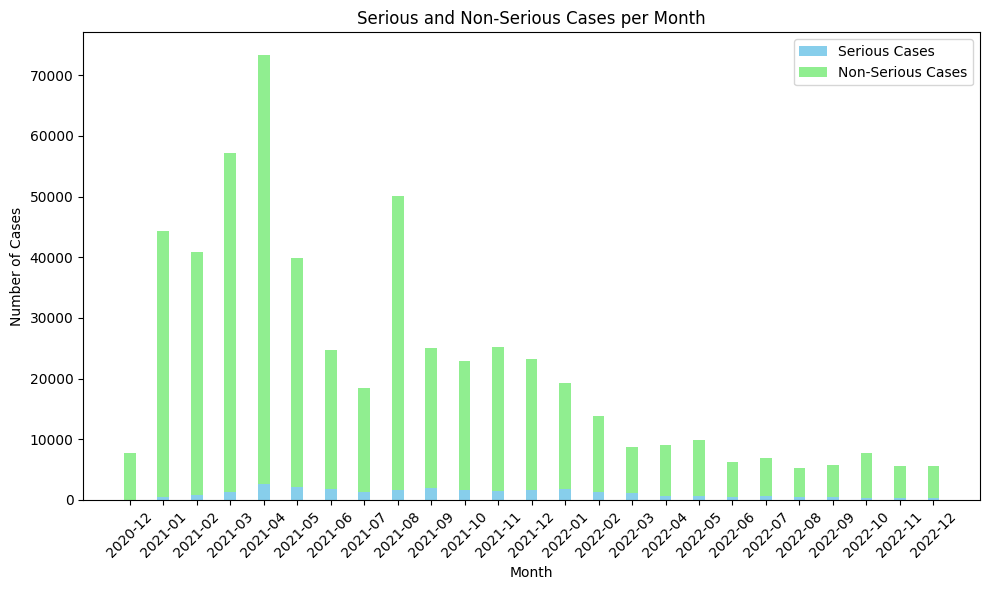

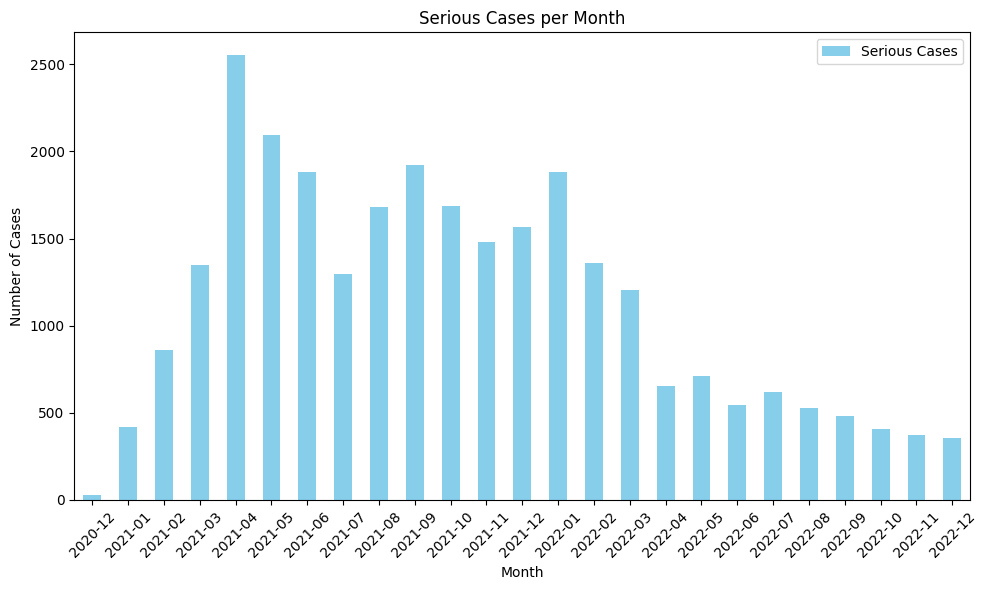

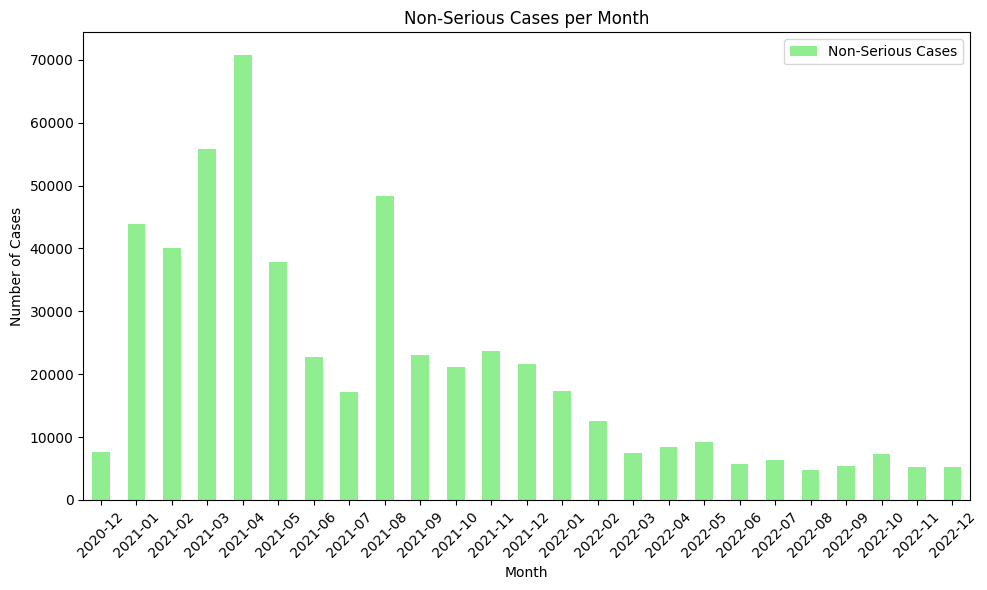

In [11]:
df['Case_Type'] = df['HOSPDAYS'].apply(lambda x: 'Serious' if x > 1 else 'Non-Serious')

# Filter data for serious and non-serious cases
serious_cases = df[df['Case_Type'] == 'Serious']
non_serious_cases = df[df['Case_Type'] == 'Non-Serious']

# Group by month and count the number of serious and non-serious cases for each month
serious_cases_per_month = serious_cases.groupby(serious_cases['DATE_TIME'].dt.to_period('M')).size()
non_serious_cases_per_month = non_serious_cases.groupby(non_serious_cases['DATE_TIME'].dt.to_period('M')).size()

# Plotting side-by-side bar charts
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = serious_cases_per_month.index.astype(str)  # Convert index to strings for plotting

bar1 = ax.bar(index, serious_cases_per_month, bar_width, label='Serious Cases', color='skyblue')
bar2 = ax.bar(index, non_serious_cases_per_month, bar_width, label='Non-Serious Cases', color='lightgreen', bottom=serious_cases_per_month)

ax.set_xlabel('Month')
ax.set_ylabel('Number of Cases')
ax.set_title('Serious and Non-Serious Cases per Month')
ax.set_xticklabels(index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# Plotting
plt.figure(figsize=(10, 6))
serious_cases_per_month.plot(kind='bar', color='skyblue', label='Serious Cases')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Serious Cases per Month')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
non_serious_cases_per_month.plot(kind='bar', color='lightgreen', label='Non-Serious Cases')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Non-Serious Cases per Month')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
df.columns.tolist()

['VAERS_ID',
 'RECVDATE',
 'STATE',
 'AGE_YRS',
 'CAGE_YR',
 'SEX',
 'SYMPTOM_TEXT',
 'DIED',
 'DATEDIED',
 'L_THREAT',
 'ER_VISIT',
 'HOSPITAL',
 'HOSPDAYS',
 'X_STAY',
 'DISABLE',
 'RECOVD',
 'VAX_DATE',
 'ONSET_DATE',
 'NUMDAYS',
 'V_ADMINBY',
 'OTHER_MEDS',
 'CUR_ILL',
 'HISTORY',
 'PRIOR_VAX',
 'FORM_VERS',
 'TODAYS_DATE',
 'BIRTH_DEFECT',
 'OFC_VISIT',
 'ER_ED_VISIT',
 'ALLERGIES',
 'SYMPTOM1',
 'SYMPTOMVERSION1',
 'SYMPTOM2',
 'SYMPTOMVERSION2',
 'SYMPTOM3',
 'SYMPTOMVERSION3',
 'SYMPTOM4',
 'SYMPTOMVERSION4',
 'SYMPTOM5',
 'SYMPTOMVERSION5',
 'Symptoms',
 'VAX_TYPE',
 'VAX_MANU',
 'VAX_DOSE_SERIES',
 'VAX_ROUTE',
 'VAX_NAME',
 'DATE_TIME',
 'Age_Group',
 'Case_Type']

In [13]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# import seaborn as sns

# # Assuming you've already loaded your data into the 'df' DataFrame as shown in your code

# # Convert the 'symp' column to a list of strings
# symptoms_list = df['symp'].tolist()

# # Create a TF-IDF vectorizer to convert text data into numerical features
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(symptoms_list)

# # Perform K-means clustering
# k = 5  # Number of clusters
# kmeans = KMeans(n_clusters=k, random_state=42)
# kmeans.fit(X)

# # Add the cluster labels to the DataFrame
# df['cluster_label'] = kmeans.labels_

# # Print the cluster labels for each symptom
# print(df[['symp', 'cluster_label']])

# import matplotlib.pyplot as plt

# # Plotting the clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['cluster_label'], palette='Set1')
# plt.xlabel('TF-IDF Feature 1')
# plt.ylabel('TF-IDF Feature 2')
# plt.title('K-means Clustering of Symptoms')
# plt.legend(title='Cluster Label')
# plt.show()



In [14]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming you've already loaded your data into the 'df' DataFrame as shown in your code
# # Concatenate symptom columns into a single column
# symptoms = df['Symptoms']
# df['symp'] = symptoms

# # Convert the 'symp' column to a list of strings
# symptoms_list = df['symp'].tolist()

# # Create a TF-IDF vectorizer to convert text data into numerical features
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(symptoms_list)

# # Perform dimensionality reduction using PCA
# pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
# X_pca = pca.fit_transform(X.toarray())  # Convert sparse matrix to array and then apply PCA

# # Perform K-means clustering
# k = 5  # Number of clusters
# kmeans = KMeans(n_clusters=k, random_state=42)
# kmeans.fit(X)

# # Add the cluster labels to the DataFrame
# df['cluster_label'] = kmeans.labels_

# # Plotting the clusters using reduced dimensions after PCA
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster_label'], palette='Set1')
# plt.xlabel('PCA Feature 1')
# plt.ylabel('PCA Feature 2')
# plt.title('K-means Clustering of Symptoms (PCA Reduced)')
# plt.legend(title='Cluster Label')
# plt.show()


In [15]:
csv_file_path = "./cleaned_vers_data_covid19_vaccine_2020-2022_duplicate_removed.csv"
df = pd.read_csv(csv_file_path)

# Check column names and state codes
print("Columns in df:", df.columns)
print("Unique state codes in df:", df['STATE'].unique())

# Count occurrences of each state
state_counts = df['STATE'].value_counts().reset_index()
state_counts.columns = ['STATE', 'Count']

C:\Users\dharm\AppData\Local\Temp\ipykernel_41172\2983974403.py:2: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


Columns in df: Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'SEX',
       'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL',
       'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE',
       'NUMDAYS', 'V_ADMINBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'Symptoms',
       'VAX_TYPE', 'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_NAME'],
      dtype='object')
Unique state codes in df: ['NJ' 'AZ' 'WV' 'LA' 'AR' 'KS' 'NM' 'NE' 'SD' 'TX' 'IN' 'AK' 'FL' 'VA'
 'CA' 'MO' 'NY' 'MI' 'MD' 'MA' 'WY' 'MN' 'ND' 'GA' 'PR' 'PA' 'RI' 'NC'
 'KY' 'WA' 'ID' 'IL' 'CO' 'OH' 'OK' 'CT' 'IA' 'MT' 'DE' 'NH' 'AL' 'DC'
 'WI' 'ME' 'HI' 'SC' 'NV' 'MS' 'TN' 'OR' 'GU' 'VT' 'UT' 'AS' 'VI

In [16]:
state_counts.head()

,STATE,Count
0,CA,60647
1,TX,34844
2,FL,32684
3,NY,31848
4,IN,23626


In [18]:
import plotly.express as px

fig = px.choropleth(state_counts, locations='STATE', locationmode='USA-states', color='Count',
                    scope="usa", color_continuous_scale='Blues', labels={'Count': 'Number of Occurrences'})
fig.update_layout(title_text='Occurrences by State')
fig.show()
